- Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

- Import & Get a view on Data

In [3]:
df = pd.read_csv('raw_data.csv')

In [3]:
df.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [4]:
df.shape

(50418, 14)

In [10]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population', 'gdp_per_capita',
       'human_development_index', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

- Data Cleaning

In [4]:
del df['Unnamed: 11']

In [5]:
del df['Unnamed: 13']

In [6]:
del df['Unnamed: 9']

In [7]:
del df['Unnamed: 10']

In [8]:
del df['Unnamed: 12']

In [16]:
df.dtypes

iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.rename(columns={'location' : 'country'},inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 50418 non-null  object        
 1   country                  50418 non-null  object        
 2   date                     50418 non-null  datetime64[ns]
 3   total_cases              47324 non-null  float64       
 4   total_deaths             39228 non-null  float64       
 5   stringency_index         43292 non-null  float64       
 6   population               50418 non-null  int64         
 7   gdp_per_capita           44706 non-null  float64       
 8   human_development_index  44216 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 3.5+ MB


In [23]:
df.isna().sum()

iso_code                       0
country                        0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

In [11]:
df['total_cases'].fillna(method='ffill',inplace=True)

In [12]:
df['total_deaths'].fillna(method='ffill',inplace=True)

In [13]:
df['stringency_index'].fillna(method='bfill',inplace=True)

In [14]:
df['gdp_per_capita'].fillna(method='bfill',inplace=True)

In [15]:
df['human_development_index'].fillna(method='bfill',inplace=True)

In [32]:
df.duplicated().sum()

0

- Data Explority (EDA) & Visualzation

In [33]:
df.sample(10)

,iso_code,country,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
17653,DEU,Germany,2020-01-01,17477.0,136.0,0.00,83783945,45229.245,0.936
5056,BLZ,Belize,2020-10-07,2243.0,34.0,69.44,397621,7824.362,0.708
23984,JPN,Japan,2020-03-04,268.0,6.0,43.52,126476458,39002.223,0.909
30764,MCO,Monaco,2020-05-10,66.0,1.0,57.41,39244,11840.846,0.741
29890,MRT,Mauritania,2020-10-09,7523.0,162.0,50.00,4649660,3597.633,0.520
42955,ESP,Spain,2020-07-08,252513.0,28396.0,55.09,46754783,34272.360,0.891
18223,GIB,Gibraltar,2020-05-16,147.0,310.0,78.70,33691,24574.382,0.870
29838,MRT,Mauritania,2020-08-18,6701.0,157.0,29.63,4649660,3597.633,0.520
40593,SYC,Seychelles,2020-09-24,143.0,776.0,36.11,98340,26382.287,0.797
29343,MLI,Mali,2020-07-30,2521.0,124.0,52.78,20250834,2014.306,0.427


In [34]:
df.describe().round(1)

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,50418.0,50418.0,50418.0,5.041800e+04,50418.0,50418.0
mean,76548.9,3212.4,51.8,4.251601e+07,20611.0,0.7
std,474218.7,14218.2,29.3,1.564607e+08,20106.3,0.2
min,0.0,0.0,0.0,8.090000e+02,661.2,0.0
25%,130.0,12.0,28.7,1.399491e+06,5819.5,0.6
50%,1795.0,85.0,57.4,8.278737e+06,13767.1,0.8
75%,17477.0,736.0,76.8,2.913681e+07,31400.8,0.9
max,8154595.0,219674.0,100.0,1.439324e+09,116935.6,1.0


<AxesSubplot: >

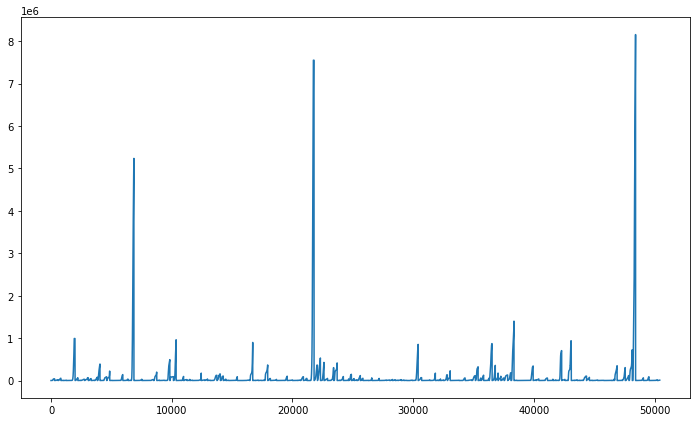

In [39]:
df['total_cases'].plot(figsize=(12,7))

<AxesSubplot: >

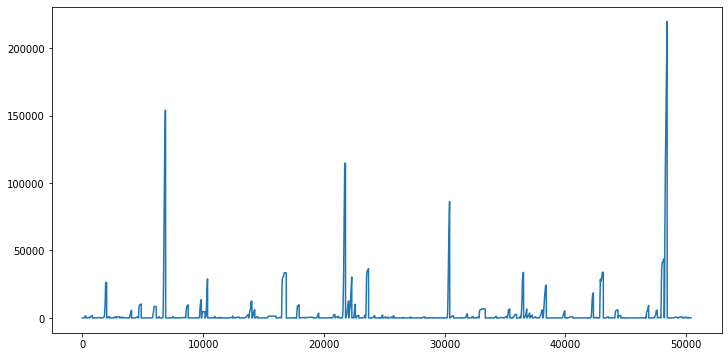

In [41]:
df['total_deaths'].plot(figsize=(12,6))

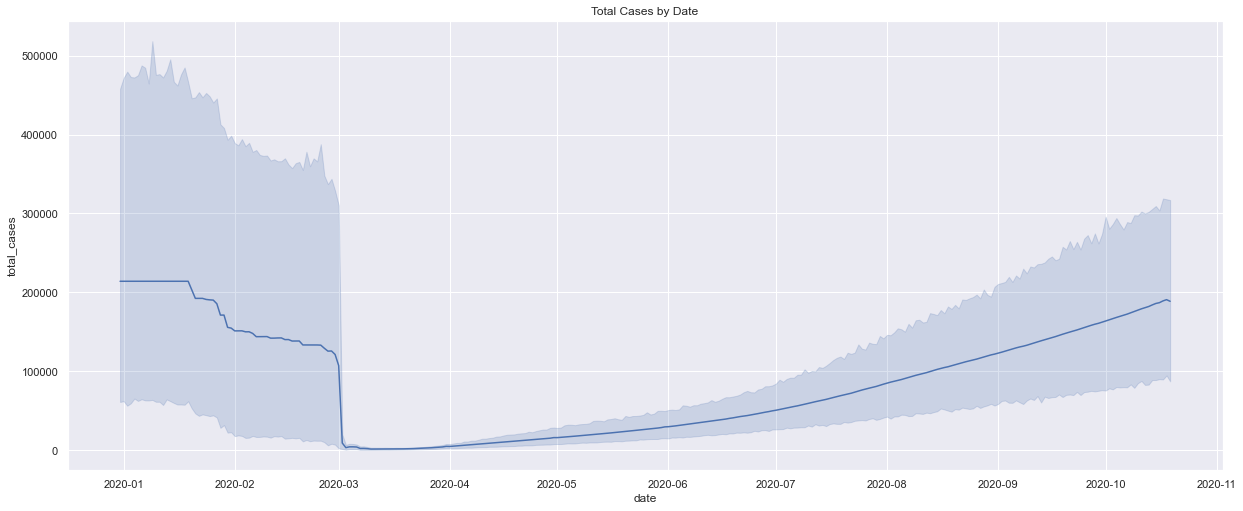

In [18]:
sn.set(rc={'figure.figsize':(20.7,8.27)})
plt.title('Total Cases by Date')
sn.lineplot(data=df , x='date' , y='total_cases' )
plt.show()

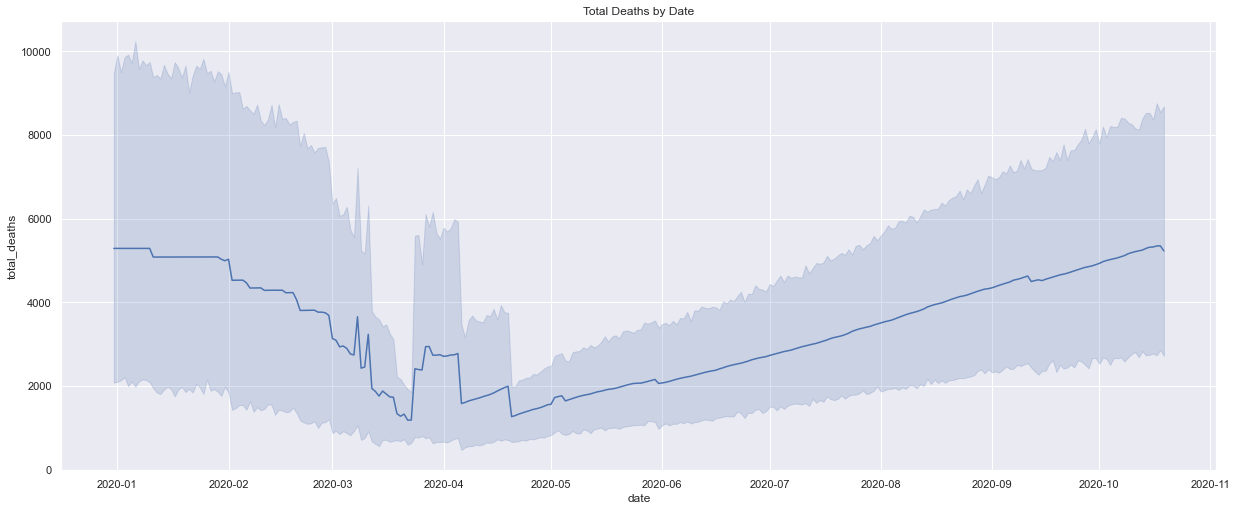

In [21]:
sn.set(rc={'figure.figsize':(20.7,8.27)})
plt.title('Total Deaths by Date')
sn.lineplot(data=df , x='date' , y='total_deaths' )
plt.show()

In [56]:
df.country.value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: country, Length: 210, dtype: int64

,total_cases
country,
United States,761184687.0
Indonesia,489687127.0
Brazil,426003311.0
India,407893299.0
Russia,138661367.0


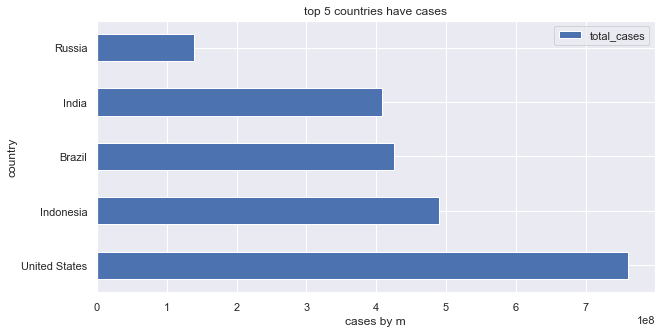

In [60]:
df.pivot_table(index='country' , values='total_cases',aggfunc=np.sum).sort_values(by='total_cases',ascending=False).head(5).plot(kind='barh',figsize=(10,5),xlabel='cases by m',title='top 5 countries have cases')
df.pivot_table(index='country' , values='total_cases',aggfunc=np.sum).sort_values(by='total_cases',ascending=False).head(5)

,total_cases
country,
Falkland Islands,2467.0
Vatican,2418.0
Montserrat,2388.0
Anguilla,614.0
Solomon Islands,11.0


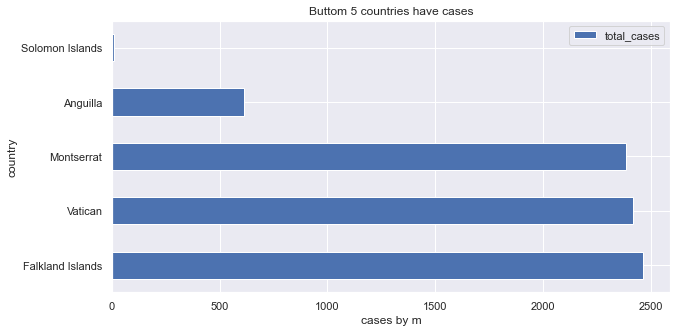

In [61]:
df.pivot_table(index='country' , values='total_cases',aggfunc=np.sum).sort_values(by='total_cases',ascending=False).tail(5).plot(kind='barh',figsize=(10,5),xlabel='cases by m',title='Buttom 5 countries have cases')
df.pivot_table(index='country' , values='total_cases',aggfunc=np.sum).sort_values(by='total_cases',ascending=False).tail(5)

,total_deaths
country,
United States,29139980.0
Brazil,14342127.0
Indonesia,9168032.0
Mexico,7296660.0
United Kingdom,7280594.0


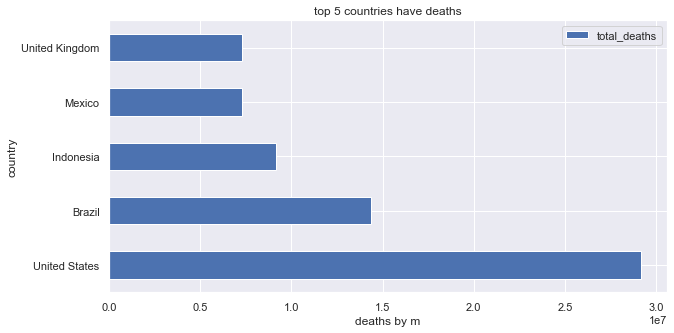

In [22]:
df.pivot_table(index='country' , values='total_deaths',aggfunc=np.sum).sort_values(by='total_deaths',ascending=False).head(5).plot(kind='barh',figsize=(10,5),xlabel='deaths by m',title='top 5 countries have deaths')
df.pivot_table(index='country' , values='total_deaths',aggfunc=np.sum).sort_values(by='total_deaths',ascending=False).head(5)

,total_deaths
country,
Cayman Islands,299.0
Cambodia,294.0
Mongolia,220.0
Liechtenstein,198.0
Laos,0.0


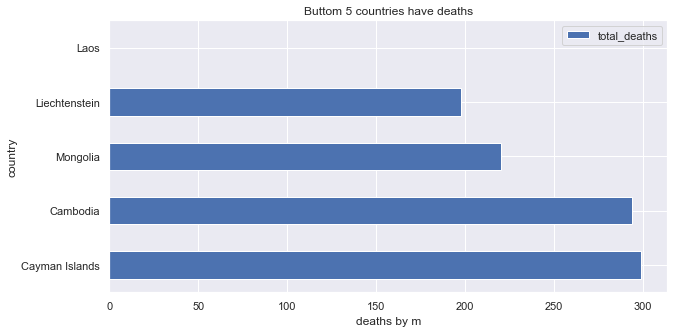

In [23]:
df.pivot_table(index='country' , values='total_deaths',aggfunc=np.sum).sort_values(by='total_deaths',ascending=False).tail(5).plot(kind='barh',figsize=(10,5),xlabel='deaths by m',title='Buttom 5 countries have deaths')
df.pivot_table(index='country' , values='total_deaths',aggfunc=np.sum).sort_values(by='total_deaths',ascending=False).tail(5)

<AxesSubplot: xlabel='population', ylabel='total_cases'>

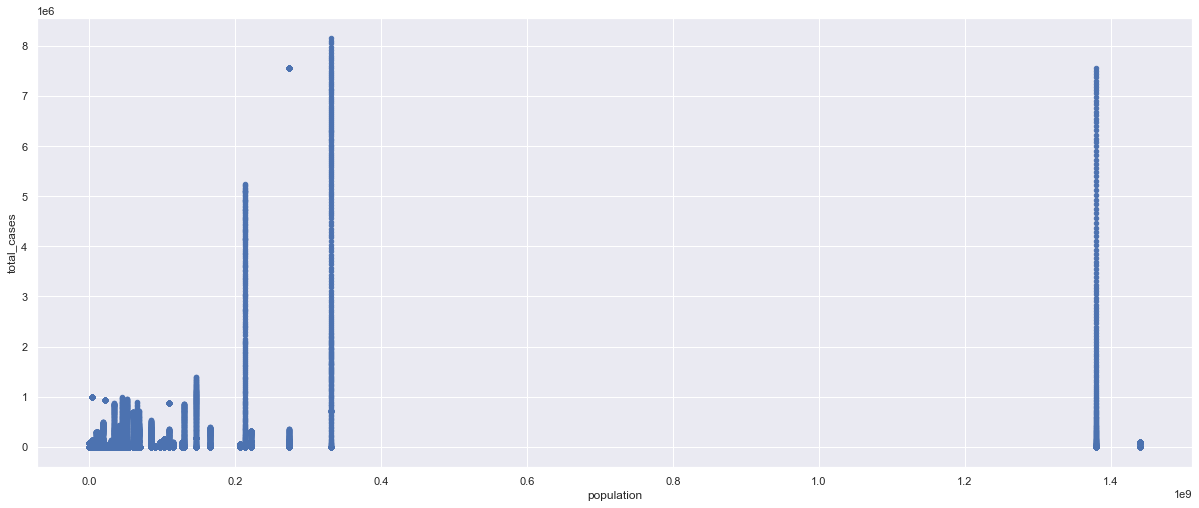

In [27]:
df.plot(x='population' , y='total_cases' , kind='scatter')

C:\Users\AS\AppData\Local\Temp\ipykernel_14388\1548145081.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).head(5).plot(kind='bar')
C:\Users\AS\AppData\Local\Temp\ipykernel_14388\1548145081.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).head(5)


,human_development_index,gdp_per_capita
country,,
Qatar,0.856,116935.600
Luxembourg,0.904,94277.965
Singapore,0.932,85535.383
British Virgin Islands,0.853,71809.251
Brunei,0.853,71809.251


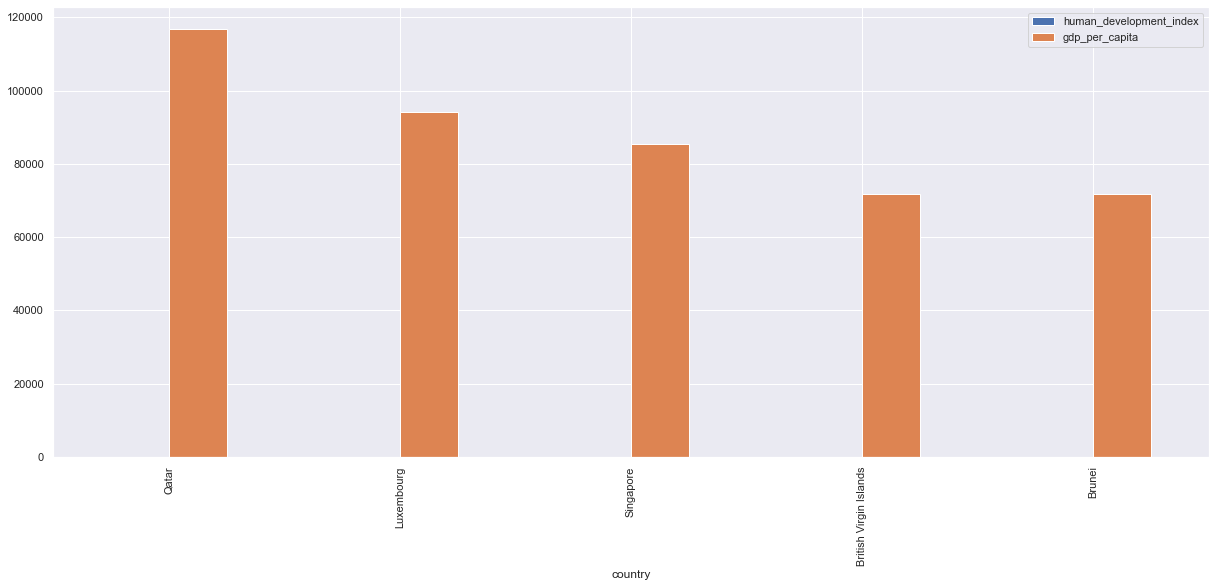

In [42]:
df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).head(5).plot(kind='bar')
df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).head(5)

C:\Users\AS\AppData\Local\Temp\ipykernel_14388\3946520059.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).tail(5).plot(kind='bar')
C:\Users\AS\AppData\Local\Temp\ipykernel_14388\3946520059.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).tail(5)


,human_development_index,gdp_per_capita
country,,
Niger,0.354,926.000
Democratic Republic of Congo,0.457,808.133
Liberia,0.435,752.788
Burundi,0.417,702.225
Central African Republic,0.367,661.240


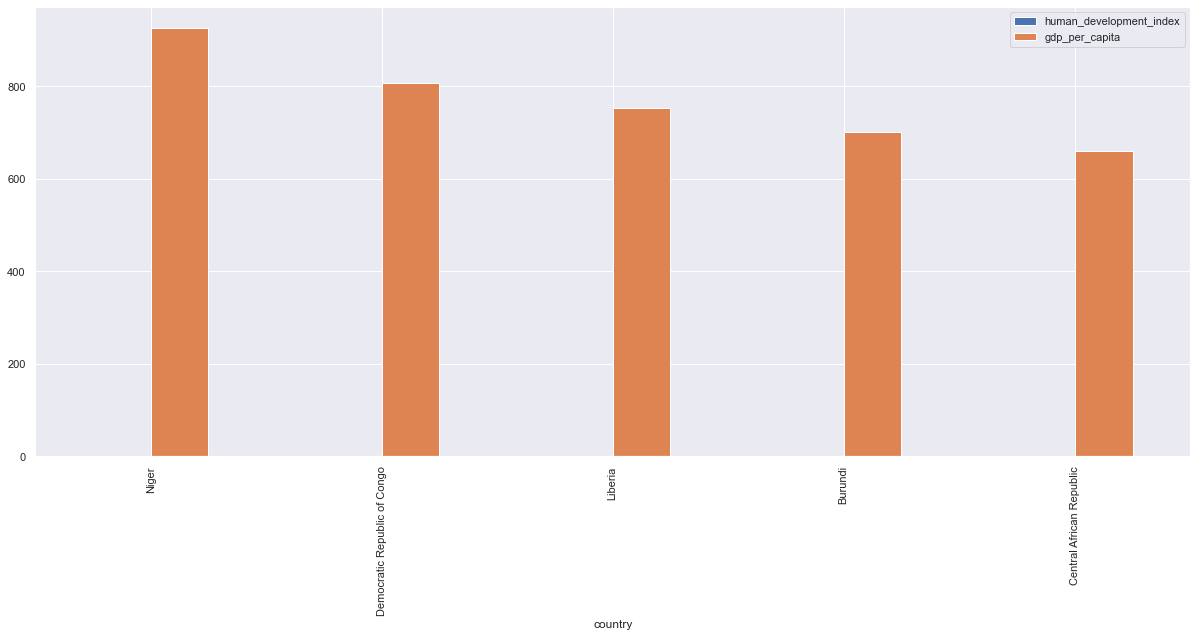

In [43]:
df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).tail(5).plot(kind='bar')
df.groupby('country').max()[{'human_development_index','gdp_per_capita'}].sort_values(by='gdp_per_capita',ascending=False).tail(5)

<AxesSubplot: xlabel='country'>

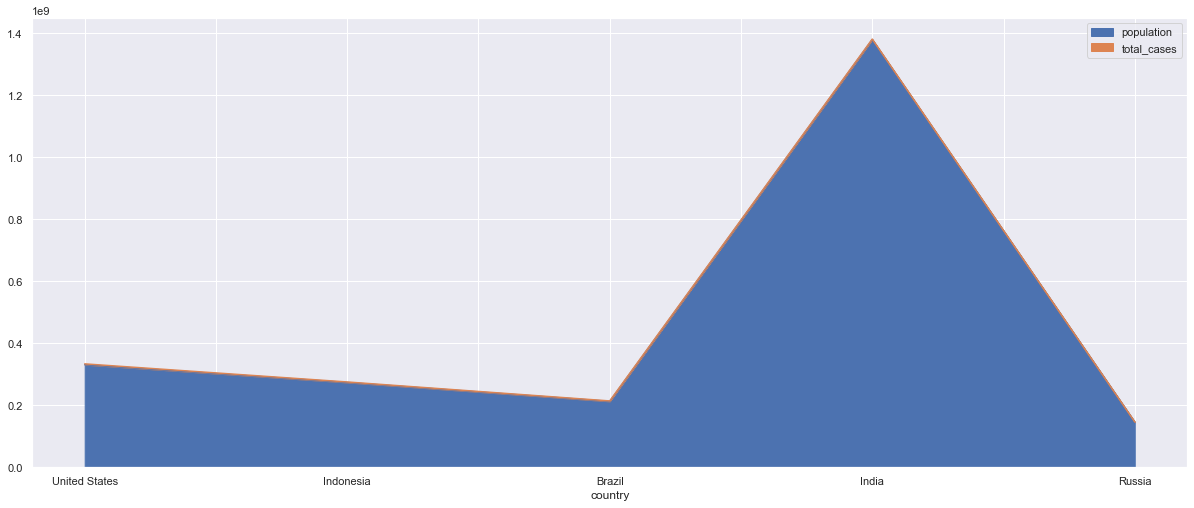

In [67]:
df.pivot_table(index='country' , values={'population' , 'total_cases' } ).sort_values(by='total_cases',ascending=False).head(5).plot(kind='area')

In [85]:
df.pivot_table(index='country' , values={'total_cases' , 'total_deaths'} , aggfunc=np.sum).sort_values(by='total_deaths',ascending=False).head(5)

,total_cases,total_deaths
country,,
United States,761184687.0,29139980.0
Brazil,426003311.0,14342127.0
Indonesia,489687127.0,9168032.0
Mexico,74353246.0,7296660.0
United Kingdom,63174296.0,7280594.0


In [84]:
df.pivot_table(index='country' , values={'total_cases' , 'total_deaths'} , aggfunc=np.sum).sort_values(by='total_deaths',ascending=False).tail(5)

,total_cases,total_deaths
country,,
Cayman Islands,33173.0,299.0
Cambodia,54731.0,294.0
Mongolia,42467.0,220.0
Liechtenstein,19886.0,198.0
Laos,4039.0,0.0


In [17]:
df.corr().round(1)

C:\Users\AS\AppData\Local\Temp\ipykernel_9572\162838519.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(1)


,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
total_cases,1.0,0.8,0.0,0.3,0.0,0.1
total_deaths,0.8,1.0,0.0,0.2,0.1,0.1
stringency_index,0.0,0.0,1.0,0.1,-0.2,-0.2
population,0.3,0.2,0.1,1.0,-0.1,-0.0
gdp_per_capita,0.0,0.1,-0.2,-0.1,1.0,0.7
human_development_index,0.1,0.1,-0.2,-0.0,0.7,1.0


In [16]:
df.to_excel('covid.xlsx')